In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

repo_path = '/Users/gkeating/repo/sma_phasing_sims'

def load_swarm_data(filename):
    with open(os.path.join(repo_path, filename)) as json_file:
        swarm_data = json.load(json_file)
    # Grab the total length of the data real quick
    n_data = len(swarm_data)

    # We're gonna be doing a lot of diff operations, which means in some cases we'll want
    # to pad some arrays with zeros. Construct some arrays now for the sake of convenience
    zero_pad = [
        np.zeros((1,len(swarm_data[0]['phases_lsb']))),
        np.zeros((1,len(swarm_data[0]['phases_usb']))),
    ]

    # These are the implemented phase values recorded in SWARM
    phases_lsb = np.array([swarm_data[idx]['phases_lsb'] for idx in range(n_data)])
    phases_usb = np.array([swarm_data[idx]['phases_usb'] for idx in range(n_data)])

    # These are the derived offsets/error terms for each antenna, given the implemented values
    cal_solution_lsb = np.array([swarm_data[idx]['cal_solution_lsb'][2] for idx in range(n_data)])
    cal_solution_usb = np.array([swarm_data[idx]['cal_solution_usb'][2] for idx in range(n_data)])

    # Let's calculate the "true" phase -- that is, assume that the solutions are perfect, and
    # use that to figure out what the antenna phase should _actually_ have been at time of obs.
    # There's kind of a funny padding operation that's needed here because of the order values
    # in the JSON file are recorded (soln's derived -> values implemented -> values recorded).
    true_phase_lsb = np.concatenate((zero_pad[0], phases_lsb[:-1] + cal_solution_lsb[1:]))
    true_phase_usb = np.concatenate((zero_pad[1], phases_usb[:-1] + cal_solution_usb[1:]))

    # Convert times from UNIX -> fractional UTC hours
    time_stamps = (np.array([swarm_data[idx]['int_time'] for idx in range(n_data)]) % 86400) / 3600.0
    
    return (true_phase_lsb, true_phase_usb, time_stamps)

In [2]:
a,b,c = load_swarm_data('phasing_data/vlbi_cal.099-2021.json')

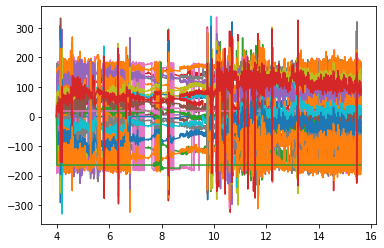

In [7]:
plt.plot(c, b)